In [123]:
! pip install bertopic

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [152]:
! pip install wordcloud

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 460.4/460.4 kB 4.2 MB/s eta 0:00:000:00:010:00:01


In [211]:
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
import pandas as pd
import nltk
import re
from sklearn.feature_extraction.text import CountVectorizer
from bertopic.representation import KeyBERTInspired
from bertopic.representation import PartOfSpeech
from bertopic.representation import MaximalMarginalRelevance
from spacy.lang.en import English
import spacy

In [212]:
df = pd.read_csv('New_Delhi_reviews.csv')

In [213]:
df.dropna(inplace = True)

In [214]:
documents = df['review_full']
documents[0:10]

0    Totally in love with the Auro of the place, re...
1    I went this bar 8 days regularly with my husba...
2    We were few friends and was a birthday celebra...
3    Fatjar Cafe and Market is the perfect place fo...
4    Hey Guys, if you are craving for pizza and sea...
5    We were looking for a special meal and we foun...
6    Kailash colony is brimming with small cafes no...
7    If you are looking for a varied selection of d...
8    Kailash Colony is the place I always head to w...
9    Real nice and comfortable bar. I am a whiskey ...
Name: review_full, dtype: object

# Performing basic cleaning

In [215]:
stopwords = nltk.corpus.stopwords.words('english')
punctuation = r'[/.!$%^&#*+\'\"()-.,:;<=>?@[\]{}|]'

In [216]:
def clean_text(text):
    """
    Clean text
    :parameters:
        text: sentence (string)
    :return: preprocessed documents without punctuations and stopwords, and lowercased
    """
    pp_text = re.sub(punctuation, ' ', text)
    pp_text = pp_text.lower()
    pp_text = ' '.join([w for w in pp_text.split() if len(w) > 1 and w not in stopwords])
    return pp_text

In [217]:
df['pp_text'] = df['review_full'].apply(clean_text)

In [218]:
# vectorizer = CountVectorizer(stop_words=None,
#                              tokenizer=None,
#                              min_df=1,
#                              max_df=0.75,
#                              ngram_range=(1, 2),
#                              lowercase=True,
#                             token_pattern=r'\b[a-zA-Z]{2,}\b')

vectorizer = CountVectorizer(stop_words=None,
                             tokenizer=None,
                             min_df=1,
                             max_df=0.75,
                             ngram_range=(1, 2),
                             lowercase=True)

vectorizer.fit_transform(df['pp_text'])
vocabulary = set(vectorizer.get_feature_names())

def countvectorized_clean(text):
    return ' '.join([w for w in text.split() if w.lower() in vocabulary])

df['pp_text'] = df['pp_text'].apply(countvectorized_clean)

In [219]:
df.head()

rating_review                                        review_full  \
0              5  Totally in love with the Auro of the place, re...   
1              5  I went this bar 8 days regularly with my husba...   
2              5  We were few friends and was a birthday celebra...   
3              5  Fatjar Cafe and Market is the perfect place fo...   
4              5  Hey Guys, if you are craving for pizza and sea...   

                                             pp_text  
0  totally love auro place really beautiful quite...  
1  went bar days regularly husband fully satisfie...  
2  friends birthday celebration food good taste r...  
3  fatjar cafe market perfect place casual lunch ...  
4  hey guys craving pizza searching visit cafe ye...

# Running topic modeling for reviews with specific ratings (rating = 5)

In [220]:
rating = 5

In [221]:
df_rating = df[df['rating_review'] == rating]
df_rating.shape

(72389, 3)

In [222]:
# # skipping basic cleaning
# df_rating['pp_text'] = df_rating['review_full']
documents = df_rating['pp_text'].to_list()

In [223]:
print(len(documents))

72389


In [224]:
# The main representation of a topic
main_representation = KeyBERTInspired()

# Additional ways of representing a topic
aspect_model1 = [KeyBERTInspired(top_n_words=30), MaximalMarginalRelevance(diversity=.5)]

# Add all models together to be run in a single `fit`
representation_model = {
   "Main": main_representation,
   "Aspect1":  aspect_model1
}

In [225]:
# Initializing BERTopic model
model = BERTopic(language = 'multilingual',
                 top_n_words = 10,
                 calculate_probabilities = True,
                 n_gram_range = (1, 2),
                 verbose = True,
                 representation_model=representation_model)

In [226]:
# fit model to documents
topics, probabilities = model.fit_transform(documents=documents)

Batches:   0%|          | 0/2263 [00:00<?, ?it/s]

2023-06-14 10:43:18,980 - BERTopic - Transformed documents to Embeddings
2023-06-14 10:43:47,919 - BERTopic - Reduced dimensionality


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

2023-06-14 10:45:45,205 - BERTopic - Clustered reduced embeddings


In [227]:
model.get_topic_info()

Topic  Count                                               Name  \
0       -1  39330           -1_restaurants_restaurant_cuisine_dining   
1        0   2390     0_music food_food music_nice music_great music   
2        1   1809  1_indian cuisine_meal india_indian restaurant_...   
3        2   1733  2_butter chicken_chicken butter_chicken good_b...   
4        3   1674         3_bar great_best bar_bartenders_grappa bar   
..     ...    ...                                                ...   
257    256     10  256_food hospitality_great customers_hospitali...   
258    257     10  257_naivedyam restaurant_restaurant sri_dishes...   
259    258     10  258_chinese cuisines_chinese cuisine_chinese f...   
260    259     10  259_heerlijk eten_bestest hospitality_hospital...   
261    260     10  260_culinary quality_excellent tastes_elaborat...   

                                        Representation  \
0    [restaurants, restaurant, cuisine, dining, buf...   
1    [music food, food music, nice music, great mus...   
2    [indian cuisine, meal india, indian restaurant...   
3    [butter chicken, chicken butter, chicken good,...   
4    [bar great, best bar, bartenders, grappa bar, ...   
..                                                 ...   
257  [food hospitality, great customers, hospitalit...   
258  [naivedyam restaurant, restaurant sri, dishes ...   
259  [chinese cuisines, chinese cuisine, chinese fo...   
260  [heerlijk eten, bestest hospitality, hospitali...   
261  [culinary quality, excellent tastes, elaborate...   

                                               Aspect1  \
0    [restaurants, dining, buffet, menu, tasty, chi...   
1    [food music, good music, rock cafe, loud music...   
2    [indian cuisine, meal india, indian restaurant...   
3    [butter chicken, chicken good, chicken chicken...   
4    [best bar, bartenders, grappa bar, cocktails, ...   
..                                                 ...   
257  [great customers, hospitality amit, drinks cou...   
258  [naivedyam restaurant, dishes dakshin, eaten n...   
259  [chinese cuisines, taste chinese, cuisines bev...   
260  [bestest hospitality, oberoi hospitality, rest...   
261  [culinary quality, served types, dining servic...   

                                   Representative_Docs  
0    [restaurant needs introduction actually review...  
1    [place amazing particularly live music weekend...  
2    [one best north indian food good food quality ...  
3    [wait well worth finger licking tandoori chick...  
4    [great service quoin bar aerocity good ambienc...  
..                                                 ...  
257  [visited last night enjoyed food hospitality s...  
258  [though live chennai starved eating spicy myso...  
259  [recently dined royal china nehru place offers...  
260  [amazing food bestest hospitality world ashok ...  
261  [great food packing food came absolutely fresh...  

[262 rows x 6 columns]

In [243]:
model.get_document_info(documents)

Document  Topic  \
0      totally love auro place really beautiful quite...     11   
1      went bar days regularly husband fully satisfie...      8   
2      friends birthday celebration food good taste r...     10   
3      fatjar cafe market perfect place casual lunch ...     -1   
4      hey guys craving pizza searching visit cafe ye...     -1   
...                                                  ...    ...   
72384  excellent food variety breakfast good services...      4   
72385  near airport calm cool environment nice staff ...     -1   
72386  favourite place stay great service ashish bhar...     -1   
72387  good food nice decoration drinks list alot cho...     -1   
72388  amazing food excellent ambience great service ...     -1   

                                                    Name  \
0                             11_cafe_place_seating_menu   
1      8_excellent service_great service_good service...   
2      10_birthday celebration_birthday party_birthda...   
3               -1_restaurants_restaurant_cuisine_dining   
4               -1_restaurants_restaurant_cuisine_dining   
...                                                  ...   
72384  4_breakfast buffet_buffet breakfast_excellent ...   
72385           -1_restaurants_restaurant_cuisine_dining   
72386           -1_restaurants_restaurant_cuisine_dining   
72387           -1_restaurants_restaurant_cuisine_dining   
72388           -1_restaurants_restaurant_cuisine_dining   

                                          Representation  \
0      [cafe, place, seating, menu, taste, tasted, dr...   
1      [excellent service, great service, good servic...   
2      [birthday celebration, birthday party, birthda...   
3      [restaurants, restaurant, cuisine, dining, buf...   
4      [restaurants, restaurant, cuisine, dining, buf...   
...                                                  ...   
72384  [breakfast buffet, buffet breakfast, excellent...   
72385  [restaurants, restaurant, cuisine, dining, buf...   
72386  [restaurants, restaurant, cuisine, dining, buf...   
72387  [restaurants, restaurant, cuisine, dining, buf...   
72388  [restaurants, restaurant, cuisine, dining, buf...   

                                                 Aspect1  \
0      [cafe, seating, menu, taste, drinks, delicious...   
1      [good service, hospitality, service mr, courte...   
2      [birthday celebration, birthday food, celebrat...   
3      [restaurants, dining, buffet, menu, tasty, chi...   
4      [restaurants, dining, buffet, menu, tasty, chi...   
...                                                  ...   
72384  [breakfast buffet, breakfast good, service bre...   
72385  [restaurants, dining, buffet, menu, tasty, chi...   
72386  [restaurants, dining, buffet, menu, tasty, chi...   
72387  [restaurants, dining, buffet, menu, tasty, chi...   
72388  [restaurants, dining, buffet, menu, tasty, chi...   

                                     Representative_Docs  \
0      [satya niketan place want overload stomach aff...   
1      [thanks lot awesome hospitality really appreci...   
2      [several time never fails deliver great place ...   
3      [restaurant needs introduction actually review...   
4      [restaurant needs introduction actually review...   
...                                                  ...   
72384  [breakfast excellent thanks joshika zaizai son...   
72385  [restaurant needs introduction actually review...   
72386  [restaurant needs introduction actually review...   
72387  [restaurant needs introduction actually review...   
72388  [restaurant needs introduction actually review...   

                                             Top_n_words  Probability  \
0      cafe - place - seating - menu - taste - tasted...     0.056673   
1      excellent service - great service - good servi...     0.135370   
2      birthday celebration - birthday party - birthd...     0.184362   
3      restaurants - restaurant - cuisine - dining - ...     0.6684

In [228]:
model.visualize_topics()

In [229]:
model.visualize_term_rank()

In [230]:
model.visualize_heatmap()

In [231]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def create_wordcloud(topic_model, topic):
    text = {word: value for word, value in topic_model.get_topic(topic)}
    wc = WordCloud(background_color="white", max_words=1000)
    wc.generate_from_frequencies(text)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

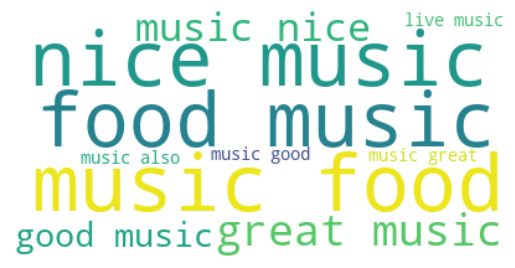

In [232]:
# Show word cloud
create_wordcloud(model, topic=0)

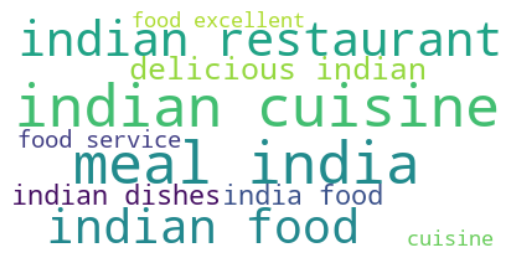

In [233]:
# Show word cloud
create_wordcloud(model, topic=1)

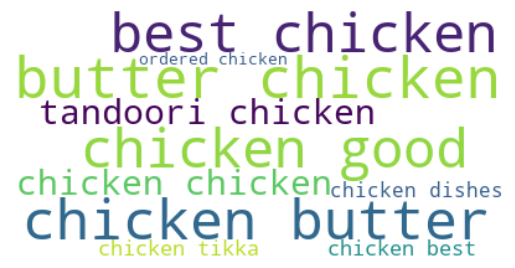

In [234]:
# Show word cloud
create_wordcloud(model, topic=2)

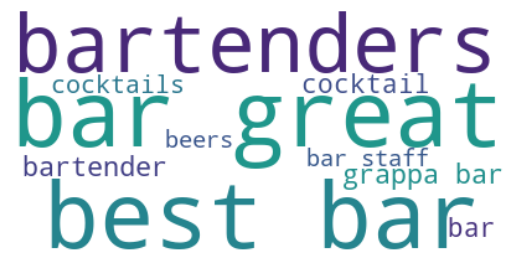

In [235]:
# Show word cloud
create_wordcloud(model, topic=3)

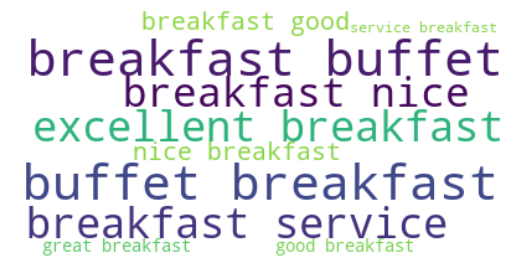

In [236]:
# Show word cloud
create_wordcloud(model, topic=4)

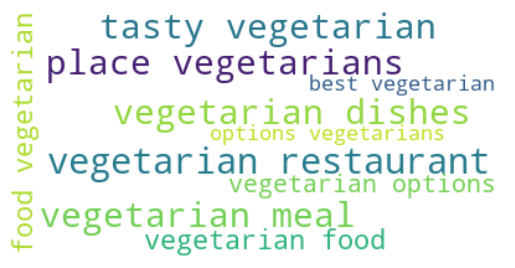

In [237]:
# Show word cloud
create_wordcloud(model, topic=5)

## Saving documents and topics into files

In [250]:
topics_info = model.get_topic_info()
documents_info = model.get_document_info(documents)

documents_info.to_csv('documents.csv', sep='\t', index=True)
topics_info.to_csv('topics.csv', sep='\t', index=True)

In [238]:
# getting word distribution per topic
topics = model.get_topics()
words_per_topic = {}
for topic_id in topics.keys():
    words = []
    for item in topics[topic_id]:
        words.append(item[0])
    words_per_topic[topic_id] = words

In [239]:
# getting topic contribution per document
contribution = probabilities
# corpus
corpus = documents
# document ids
doc_ids_list = range(len(corpus))

In [244]:
import numpy as np

docs_info = model.get_document_info(documents)

# create dataframes to hold the solutions
# ignoring topic -1
topic_csv_df = pd.DataFrame()
doc_csv_df = pd.DataFrame()

# Get main topic in each document
for i, row in enumerate(contribution):
    max_score = np.max(row)
    topic_num = np.argmax(row)

    try:
        ind = np.argpartition(row, -5)[-5:]
        top5 = ind[np.argsort(row[ind])]
        top5 = np.flip(top5)
    except:
        ind = np.argpartition(row, -1)[-1:]
        top5 = ind[np.argsort(row[ind])]
        top5 = np.flip(top5)

    doc_csv_df = doc_csv_df.append(pd.Series([int(topic_num), round(max_score, 4), top5]), ignore_index=True)
doc_csv_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Top5_Topics']

# adding document id and numero unificado
juris_ids = pd.Series(doc_ids_list)
doc_csv_df = pd.concat([juris_ids, doc_csv_df], axis=1)

# Add original text to the end of the output
contents = pd.Series(corpus)
doc_csv_df = pd.concat([doc_csv_df, contents], axis=1)

# Format
doc_csv_df.columns = ['Document_id', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Top5_Topics', 'Ementa']

for topic_num in range(0, len(words_per_topic)-1):
    wp = words_per_topic[topic_num]
    topic_keywords = ", ".join([word for word in wp])
    topic_csv_df = topic_csv_df.append(pd.Series([topic_num, topic_keywords]), ignore_index=True)
topic_csv_df.columns = ['Topic', 'Keywords']

print(doc_csv_df.shape)
print(topic_csv_df.shape)

doc_csv_df.to_csv('documents.csv', sep='\t', index=False)
topic_csv_df.to_csv('topics.csv', sep='\t', index=False)

(72389, 5)
(262, 2)
